In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 이전 수치를 통해 다음 수치를 예측, 1: 이전 수치 1개를 참고함.
def create_dataset(signal_data, look_back=1):  
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
# 기초 기술
look_back = 1
train_1 = np.array([1, 2, 3, 4, 5])
train_1 = train_1.reshape(5, 1)
x_train_1, y_train_1 = create_dataset(train_1, look_back)
print(x_train_1)
print('-----------------------')
print(y_train_1)
print('-----------------------')

[[1]
 [2]
 [3]
 [4]]
-----------------------
[2 3 4 5]
-----------------------


In [4]:
# 3차원 4면 1행 1열로 변경
train_1 = np.array([1, 2, 3, 4, 5])
x_train = np.reshape(x_train_1, (x_train_1.shape[0], x_train_1.shape[1], 1)) 
print(x_train)
print('-----------------------')

[[[1]]

 [[2]]

 [[3]]

 [[4]]]
-----------------------


In [5]:
train_1 = np.array([1, 2, 3, 4, 5])
train_1 = train_1.reshape(5, 1)
print(train_1)
print('-----------------------')
train_1 = np.squeeze(train_1) # 1차원을 제거함.
print(train_1)
print('-----------------------')

[[1]
 [2]
 [3]
 [4]
 [5]]
-----------------------
[1 2 3 4 5]
-----------------------


In [6]:
x_train = np.squeeze(x_train)
print(x_train)
print('-----------------------')
for i in range(2):
    print(i)
print('-----------------------')    
a1 = np.ones((2, 3))
print(a1)
a2 = np.zeros((2, 2))
print(a2)
a12 = np.hstack([a1, a2])
print(a12)

[1 2 3 4]
-----------------------
0
1
-----------------------
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]]


In [7]:
look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리, 0 ~ 1 사이의 값으로 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)


In [8]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리, 3차원 800면 1행 1열로 변경
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print('--------------------')
x_train = np.squeeze(x_train)  # 차원 축소, 1차원을 제거함.
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(760, 40, 1)
(360, 40, 1)
(360, 40, 1)
--------------------
(760, 40)
(360, 40)
(360, 40)


In [9]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))


Train on 760 samples, validate on 360 samples
Epoch 1/100
760/760 [==============================] - 1s 774us/step - loss: 0.1162 - val_loss: 0.0218
Epoch 2/100
760/760 [==============================] - 0s 64us/step - loss: 0.0569 - val_loss: 0.0498
Epoch 3/100
760/760 [==============================] - 0s 59us/step - loss: 0.0399 - val_loss: 0.0280
Epoch 4/100
760/760 [==============================] - 0s 61us/step - loss: 0.0378 - val_loss: 0.0152
Epoch 5/100
760/760 [==============================] - 0s 67us/step - loss: 0.0373 - val_loss: 0.0246
Epoch 6/100
760/760 [==============================] - 0s 59us/step - loss: 0.0315 - val_loss: 0.0201
Epoch 7/100
760/760 [==============================] - 0s 67us/step - loss: 0.0290 - val_loss: 0.0137
Epoch 8/100
760/760 [==============================] - 0s 74us/step - loss: 0.0285 - val_loss: 0.0169
Epoch 9/100
760/760 [==============================] - 0s 71us/step - loss: 0.0258 - val_loss: 0.0254
Epoch 10/100
760/760 [=============

Epoch 80/100
760/760 [==============================] - 0s 62us/step - loss: 0.0130 - val_loss: 0.0162
Epoch 81/100
760/760 [==============================] - 0s 59us/step - loss: 0.0120 - val_loss: 0.0185
Epoch 82/100
760/760 [==============================] - 0s 67us/step - loss: 0.0113 - val_loss: 0.0182
Epoch 83/100
760/760 [==============================] - 0s 75us/step - loss: 0.0113 - val_loss: 0.0176
Epoch 84/100
760/760 [==============================] - 0s 78us/step - loss: 0.0118 - val_loss: 0.0166
Epoch 85/100
760/760 [==============================] - 0s 78us/step - loss: 0.0130 - val_loss: 0.0157
Epoch 86/100
760/760 [==============================] - 0s 78us/step - loss: 0.0123 - val_loss: 0.0189
Epoch 87/100
760/760 [==============================] - 0s 62us/step - loss: 0.0127 - val_loss: 0.0169
Epoch 88/100
760/760 [==============================] - 0s 58us/step - loss: 0.0115 - val_loss: 0.0170
Epoch 89/100
760/760 [==============================] - 0s 59us/step - lo

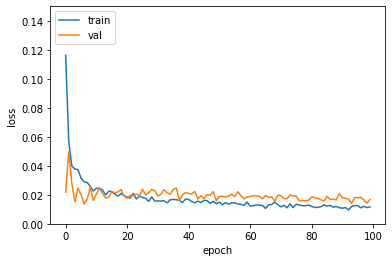

In [10]:

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0) # verbose=0: 처리과정 출력안함.
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.0171441955982
Validataion Score:  0.0168355283431
Test Score:  0.0168355283431


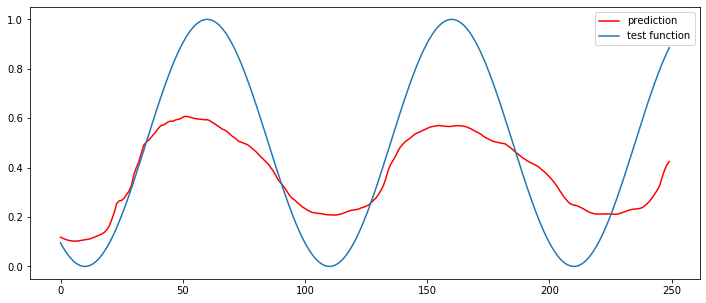

In [12]:
# 7. 모델 사용하기
look_ahead = 250  # 250개 예측
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
# print(predictions[0:10])
for i in range(look_ahead): # 0 ~ 249
    prediction = model.predict(xhat, batch_size=32)  # 예측
    predictions[i] = prediction  # 예측 결과 저장
    xhat = np.hstack([xhat[:,1:],prediction])  # 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다.
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()